In [138]:
# import add-ons
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import numpy as np #imports
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
from scipy import stats
import netCDF4
import cmocean
from dateutil import parser


In [139]:
# Store Filepaths
dabob_fp = 'data/ORCA_Dabobbay-H1_Oxygen.csv'
hansville_fp = 'data/ORCA_Hansville-H1_Oxygen.csv'
hoodsport_fp = 'data/ORCA_Hoodsport-H1_Oxygen.csv'
twanoh_fp = 'data/ORCA_Twanoh-H1_Oxygen.csv'

In [140]:
# Open and Read Data
dabob_df = pd.read_csv(dabob_fp,header = 0)
hansville_df = pd.read_csv(hansville_fp,header = 0)
hoodsport_df = pd.read_csv(hoodsport_fp,header = 0)
twanoh_df = pd.read_csv(twanoh_fp,header = 0)

# Convert Units to String
dabob_df[' Depth (Ft)'].astype(str)  
# Create List for unitless depths
dabob_df_d = []
# Remove units and add to list
for x in dabob_df[' Depth (Ft)']:
    dabob_df_new = x.split(' ')
    dabob_df_d.append(dabob_df_new[1])
dabob_df['Depth'] = dabob_df_d    
dabob_df['Depth'] =dabob_df['Depth'].astype(int)

    # Convert Units to String
hansville_df[' Depth (Ft)'].astype(str)  
# Create List for unitless depths
hansville_df_d = []
# Remove units and add to list
for x in hansville_df[' Depth (Ft)']:
    hansville_df_new = x.split(' ')
    hansville_df_d.append(hansville_df_new[1])
hansville_df['Depth'] = hansville_df_d
hansville_df['Depth'] =hansville_df['Depth'].astype(int)

    # Convert Units to String
hoodsport_df[' Depth (Ft)'].astype(str)  
# Create List for unitless depths
hoodsport_df_d = []
# Remove units and add to list
for x in hoodsport_df[' Depth (Ft)']:
    hoodsport_df_new = x.split(' ')
    hoodsport_df_d.append(hoodsport_df_new[1])
hoodsport_df['Depth'] = hoodsport_df_d 
hoodsport_df['Depth'] =hoodsport_df['Depth'].astype(int)

    # Convert Units to String
twanoh_df[' Depth (Ft)'].astype(str)  
# Create List for unitless depths
twanoh_df_d = []
# Remove units and add to list
for x in twanoh_df[' Depth (Ft)']:
    twanoh_df_new = x.split(' ')
    twanoh_df_d.append(twanoh_df_new[1])
twanoh_df['Depth'] = twanoh_df_d 
twanoh_df['Depth'] =twanoh_df['Depth'].astype(int)

# Clean DF
# Find Indeces for Oct 13, 2023
dabob_inds = np.where(dabob_df['Date and Time']=='2023-10-13T12:17:00-0700')
hansville_inds = np.where(hansville_df['Date and Time']=='2023-10-13T12:20:16-0700')
hoodsport_inds = np.where(hoodsport_df['Date and Time']=='2023-10-13T12:19:59-0700')
twanoh_inds = np.where(twanoh_df['Date and Time']=='2023-10-13T12:08:54-0700')

# Create Data Frames for Oct 13, 2023
dabob10_13 = dabob_df.loc[dabob_inds]
hansville10_13 = hansville_df.loc[hansville_inds]
hoodsport10_13 = hoodsport_df.loc[hoodsport_inds]
twanoh10_13 = twanoh_df.loc[twanoh_inds]

In [141]:
# Sort Values by Depth
dabob10_13 = dabob10_13.sort_values('Depth',ascending = False)

hoodsport10_13 = hoodsport10_13.sort_values('Depth',ascending = False)

hansville10_13 = hansville10_13.sort_values('Depth',ascending = False)

twanoh10_13 = twanoh10_13.sort_values('Depth',ascending = False)

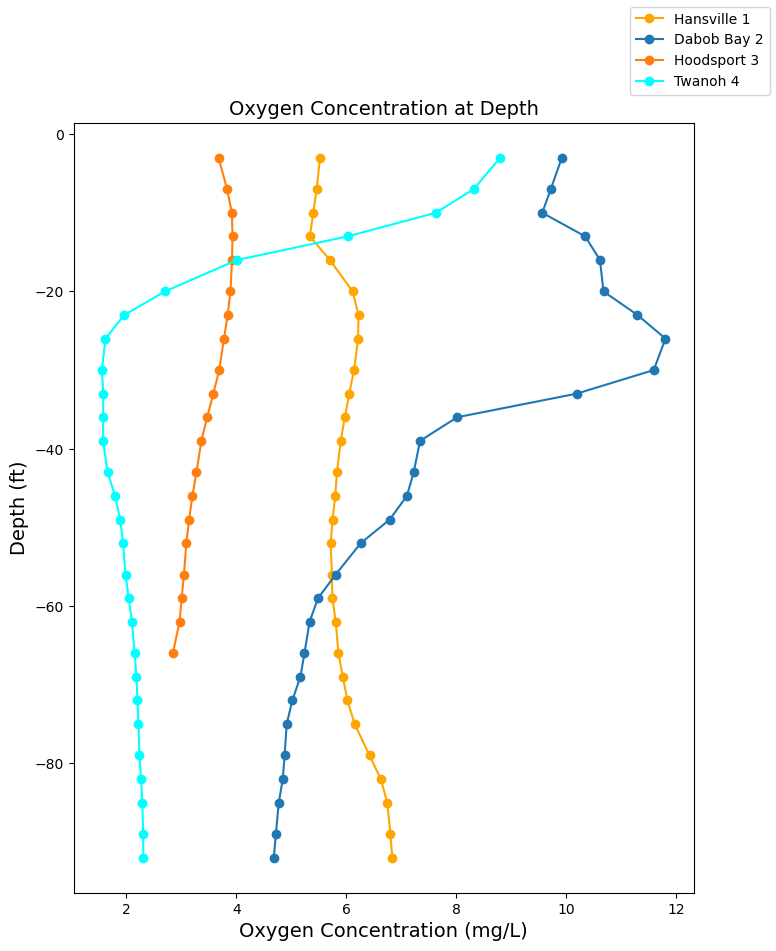

In [142]:
# Oxygen Depth Profiles

# Create Plot
fig,axs = plt.subplots(figsize = (8,10))

# Plot Data
axs.plot(hansville10_13[' Oxygen Conc. (mg/L)'],hansville10_13['Depth'],label = 'Hansville 1',color = 'orange',marker = 'o')
axs.plot(dabob10_13[' Oxygen Conc. (mg/L)'],dabob10_13['Depth'],label = 'Dabob Bay 2',marker = 'o')
axs.plot(hoodsport10_13[' Oxygen Conc. (mg/L)'],hoodsport10_13['Depth'],label = 'Hoodsport 3',marker = 'o')
axs.plot(twanoh10_13[' Oxygen Conc. (mg/L)'],twanoh10_13['Depth'],label = 'Twanoh 4',color = 'Cyan',marker = 'o')

# Adds Axis and Figure Titles
axs.set_xlabel('Oxygen Concentration (mg/L)',fontsize = 14)
axs.set_ylabel('Depth (ft)',fontsize = 14)
axs.set_title('Oxygen Concentration at Depth',fontsize = 14)

# Add Other Required Features
fig.legend()
plt.show()

Datetime,2023-09-01 12:16:48-07:00,2023-09-02 12:16:54-07:00,2023-09-03 12:17:17-07:00,2023-09-04 12:17:20-07:00,2023-09-05 12:16:54-07:00,2023-09-06 12:16:56-07:00,2023-09-07 12:16:57-07:00,2023-09-08 12:16:59-07:00,2023-09-09 12:16:46-07:00,2023-09-10 12:16:48-07:00,...,2023-11-08 12:16:43-08:00,2023-11-09 12:16:58-08:00,2023-11-10 12:17:06-08:00,2023-11-11 12:16:45-08:00,2023-11-12 12:17:12-08:00,2023-11-13 12:17:11-08:00,2023-11-14 12:16:36-08:00,2023-11-15 12:17:26-08:00,2023-11-16 12:16:42-08:00,2023-11-17 12:16:34-08:00
Depth,,,,,,,,,,,,,,,,,,,,,
-92,5.1216,5.0397,5.1062,4.7118,4.7438,5.2607,4.8039,4.9134,5.1764,5.0181,...,4.6818,4.6818,4.6818,4.6818,4.6818,4.6818,4.6818,4.6818,4.6818,4.6818
-89,5.2166,5.1298,5.1806,4.7858,4.8041,5.3919,4.9053,5.0892,5.3579,5.2087,...,4.7196,4.7196,4.7196,4.7196,4.7196,4.7196,4.7196,4.7196,4.7196,4.7196
-85,5.3245,5.2013,5.2772,4.8532,4.9079,5.4686,5.0275,5.2325,5.5964,5.3758,...,4.7727,4.7727,4.7727,4.7727,4.7727,4.7727,4.7727,4.7727,4.7727,4.7727
-82,5.4581,5.3091,5.3615,4.9926,5.0580,5.5164,5.0696,5.4536,5.8005,5.5518,...,4.8451,4.8451,4.8451,4.8451,4.8451,4.8451,4.8451,4.8451,4.8451,4.8451
-79,5.6339,5.4244,5.4417,5.1908,5.1433,5.5344,5.0854,5.7194,5.9669,5.7691,...,4.8782,4.8782,4.8782,4.8782,4.8782,4.8782,4.8782,4.8782,4.8782,4.8782
-75,5.8087,5.5748,5.5350,5.4671,5.2418,5.6149,5.1384,5.9936,6.1502,5.9692,...,4.9168,4.9168,4.9168,4.9168,4.9168,4.9168,4.9168,4.9168,4.9168,4.9168
-72,5.8984,5.6889,5.5876,5.7428,5.3952,5.8279,5.2438,6.2861,6.3268,6.1799,...,5.0189,5.0189,5.0189,5.0189,5.0189,5.0189,5.0189,5.0189,5.0189,5.0189
-69,5.9367,5.7572,5.6109,5.9041,5.5916,6.0581,5.4131,6.5900,6.5313,6.3749,...,5.1655,5.1655,5.1655,5.1655,5.1655,5.1655,5.1655,5.1655,5.1655,5.1655
-66,5.9673,5.8928,5.6933,6.0033,5.7968,6.2493,5.6918,6.9324,6.8233,6.6195,...,5.2396,5.2396,5.2396,5.2396,5.2396,5.2396,5.2396,5.2396,5.2396,5.2396


(19601.0, 19630.0)

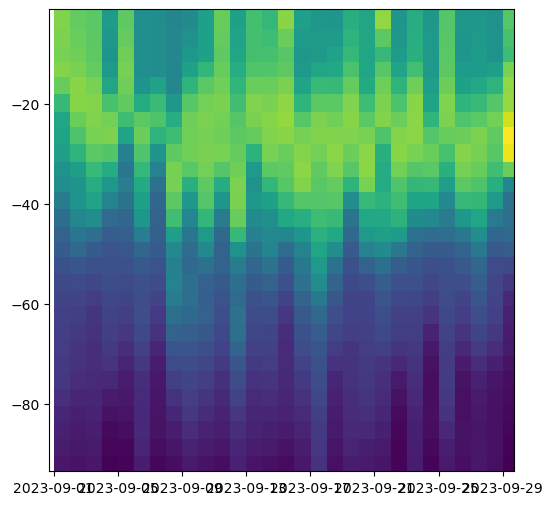

In [160]:
# Dissolved Oxygen Over Time and Depth

# Convert Datetime strings to Datetimes
# Create Empty List
datetimes = []
# Convert String to Datetime Object
for date in dabob_df['Date and Time']:
    datetimes.append(parser.parse(date))
# Subsets Datetimes to Dataframe
dabob_df['Datetime'] = datetimes
#dabob_df['Datetime'] = dabob_df['Datetime'].astype(str)

#Create Daily Datetime Integers
#dabob_dateint = []
#for x in dabob_df['Datetime']:
    #dabob_datedec = x.split('-')
    #dabob_dateint.append(int(dabob_datedec[0])+(int(dabob_datedec[1])/100)+(int(dabob_datedec[2][:2])/10000))
#dabob_df['Datetime'] = dabob_dateint

# Convert to Int
dabob_df['Depth']= dabob_df['Depth'].astype(int)

# Create 2d Array
piv = pd.pivot_table(dabob_df, index='Depth', columns='Datetime', values=' Oxygen Conc. (mg/L)',sort = True)
piv = piv.sort_index()
piv_new = piv.to_numpy()
display(piv)
# Set X and Y
x= piv.columns
y= piv.index.values
X,Y = np.meshgrid(x,y)

#Plot 
fig,axs = plt.subplots(figsize = (6,6))
axs.pcolormesh(X,Y,piv_new)
# Set Axis Labels and Title
axs.set_xlim(left = datetime.fromisoformat('2023-09-01'), right = datetime.fromisoformat('2023-09-30'))

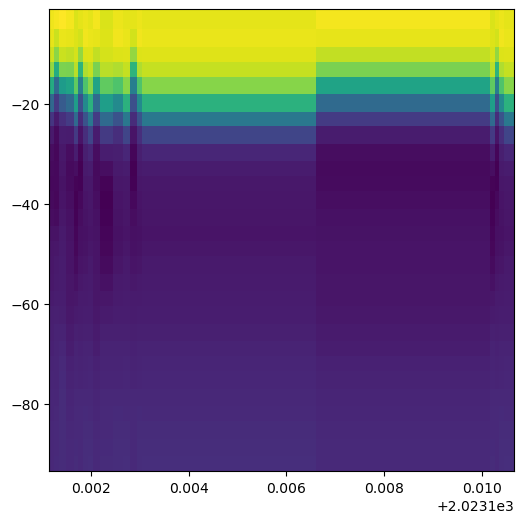

In [144]:
# twanoh Dissolved Oxygen Over Time and Depth

# Convert Datetime strings to Datetimes
datetimes = []
for date in twanoh_df['Date and Time']:
    datetimes.append(parser.parse(date))
# Subsets Datetimes to Dataframe
twanoh_df['Datetime'] = datetimes
twanoh_df['Datetime'] = twanoh_df['Datetime'].astype(str)

#Create Daily Datetime Integers
twanoh_dateint = []
for x in twanoh_df['Datetime']:
    twanoh_datedec = x.split('-')
    twanoh_dateint.append(int(twanoh_datedec[0])+(int(twanoh_datedec[1])/100)+(int(twanoh_datedec[2][:2])/10000))
twanoh_df['Datetime'] = twanoh_dateint

# Sort Values
twanoh_df = twanoh_df.sort_values('Depth', ascending = True)
# Convert to Int
twanoh_df['Depth']= twanoh_df['Depth'].astype(int)

# Create 2d Array
piv = pd.pivot_table(twanoh_df, index='Depth', columns='Datetime', values=' Oxygen Conc. (mg/L)',sort = True)
piv = piv.sort_index()
piv_new = piv.to_numpy()

# Set X and Y
x= piv.columns
y= piv.index.values
X,Y = np.meshgrid(x,y)

#Plot 
fig,axs = plt.subplots(figsize = (6,6))
axs.pcolormesh(X,Y,piv_new)
# Set Axis Labels and Title
#axs.set_xlim(left = 2023.09, right = 2023.10)